# 1. Chargement et exploration initiale des données
• Importer les bibliothèques nécessaires (pandas, numpy, matplotlib, seaborn, 
sklearn) <br>
• Charger le dataset <br>
• Afficher les premières lignes et les informations de base (types de données, 
statistiques descriptives

In [109]:
#Projet Python pour data sciences 
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb, sklearn as sk
#import geopandas as gpd  #pour la carte
df=pd.read_csv("Engineering_graduate_salary.csv")

df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


# 2. Nettoyage et préparation des données
• Identifier et gérer les valeurs manquantes <br>
• Utiliser des techniques comme l'imputation par la moyenne/médiane ou 
des méthodes plus avancées <br>
• Détecter et traiter les valeurs aberrantes<br>
• Utiliser la méthode IQR (IQR = Q3 - Q1) ou z-score pour identifier les 
outliers<br>
• Décider de les supprimer ou de les transformer selon le contexte


In [110]:
nombre_de_lignes = df.shape[0]
print("Nombre de lignes :", nombre_de_lignes)

# Identification des valeurs manquantes
valeurs_vides = df.isnull().sum()

# On ne veut afficher que les colonnes ayant des valeurs manquantes 
colonnes_vides = valeurs_vides[valeurs_vides != 0]
print(colonnes_vides)

Nombre de lignes : 2998
Series([], dtype: int64)


In [111]:
# A présent, on veut gérer ces valeurs manquantes pour qu'elles ne faussent pas nos résultats
# Nous analysons tout d'abord la colonne 'preciptype' :

# Afficher les infos de la colonne 'Gender'
print(df['Gender'].describe(include='all'))

# Afficher la distribution des valeurs dans 'Gender', y compris les valeurs manquantes
print("")
print(df['Gender'].value_counts(dropna=False))

# Utilise la valeur la + fréquente pour remplacer les valeurs manquantes
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)



# Résultat
print("")
print("Résultat final :")
print(df['Gender'].isnull().sum())


count     2998
unique       2
top          m
freq      2282
Name: Gender, dtype: object

Gender
m    2282
f     716
Name: count, dtype: int64

Résultat final :
0


In [112]:
df.replace(-1,pd.NA, inplace=True)  #remplacer -1 par Na


df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,<NA>,<NA>,<NA>,<NA>,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,<NA>,<NA>,<NA>,<NA>,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,<NA>,<NA>,260,<NA>,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,<NA>,<NA>,<NA>,<NA>,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,<NA>,<NA>,<NA>,<NA>,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


# 3. Analyse exploratoire des données (EDA)
• Visualiser la distribution des variables (histogrammes, boxplots) <br>
• Analyser les corrélations entre les variables (heatmap de corrélation)<br>
• Créer des visualisations pertinentes pour comprendre les relations entre les 
variables et le statut diabétique

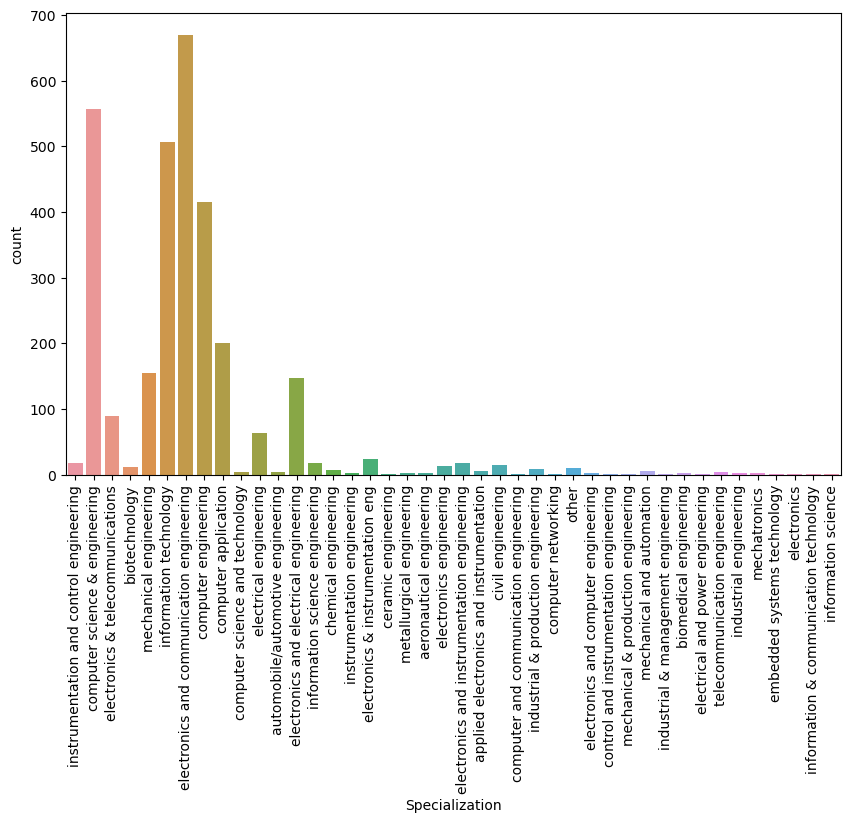

In [113]:
# repartition des étudiants selon leur specialité 
plt.figure(figsize=(10, 6))
sb.countplot(data=df, x='Specialization')
plt.xticks(rotation=90)
plt.show()

c:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


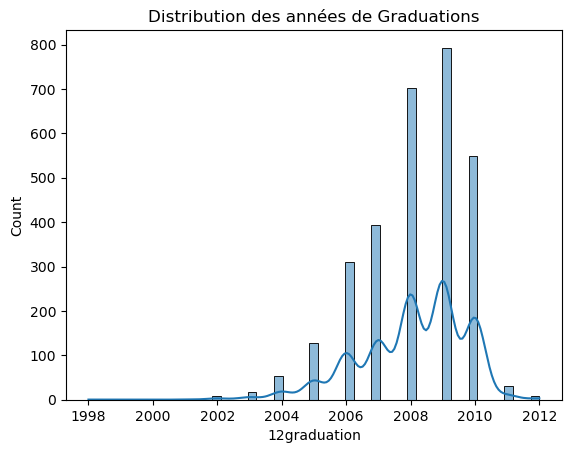

In [114]:
# Distribution des Graduations maximales
sb.histplot(df['12graduation'], kde=True)
plt.title('Distribution des années de Graduations')
plt.show()

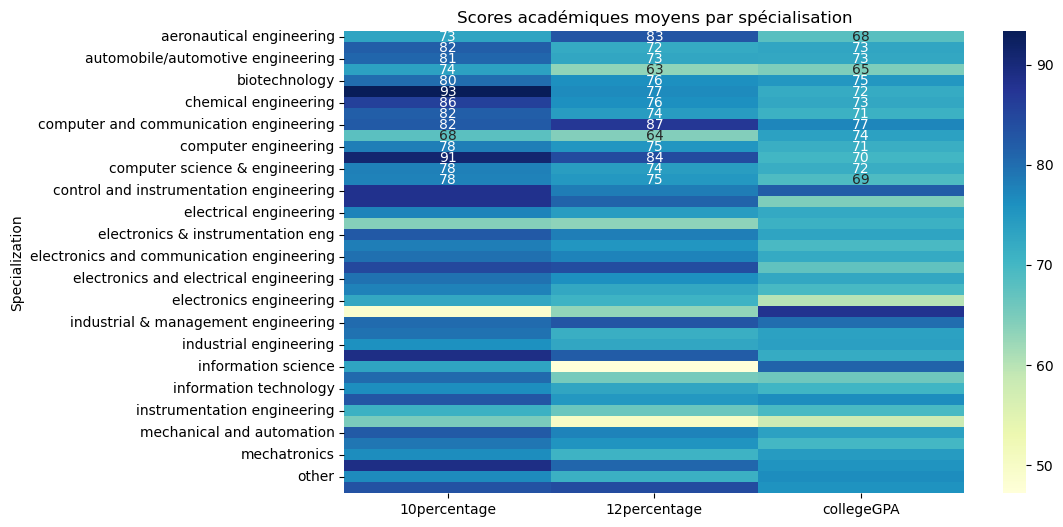

In [115]:

specialization_scores = df.groupby('Specialization')[['10percentage', '12percentage', 'collegeGPA']].mean()

# Créer la heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(specialization_scores, annot=True, cmap='YlGnBu')
plt.title('Scores académiques moyens par spécialisation')
plt.show()

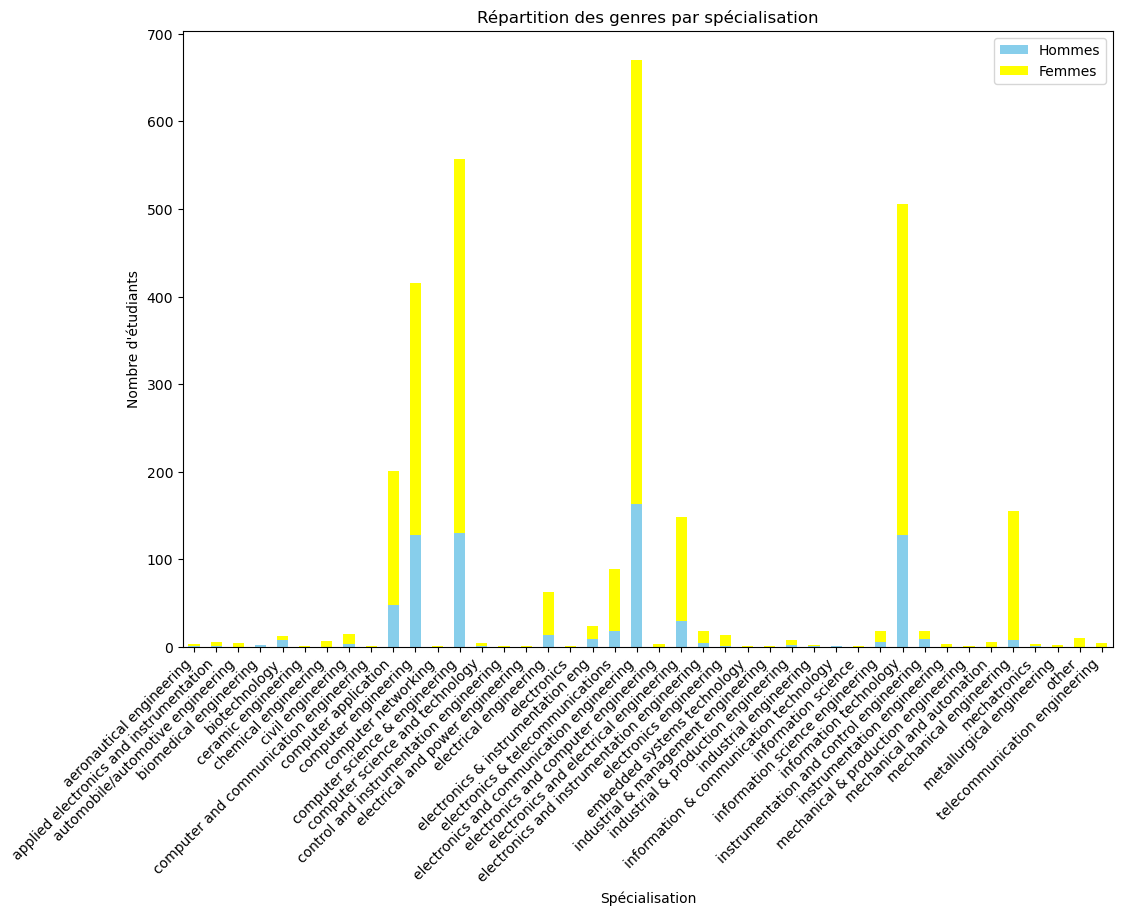

In [116]:
# répartion H/F par spécialisation
# Compter le nombre d'hommes et de femmes par spécialisation
gender_specialization = df.groupby(['Specialization', 'Gender']).size().unstack()

# Créer le graphique en barres empilées
gender_specialization.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'yellow'])
plt.title('Répartition des genres par spécialisation')
plt.xlabel('Spécialisation')
plt.ylabel('Nombre d\'étudiants')
plt.legend(['Hommes', 'Femmes'])
plt.xticks(rotation=45, ha='right')
plt.show()

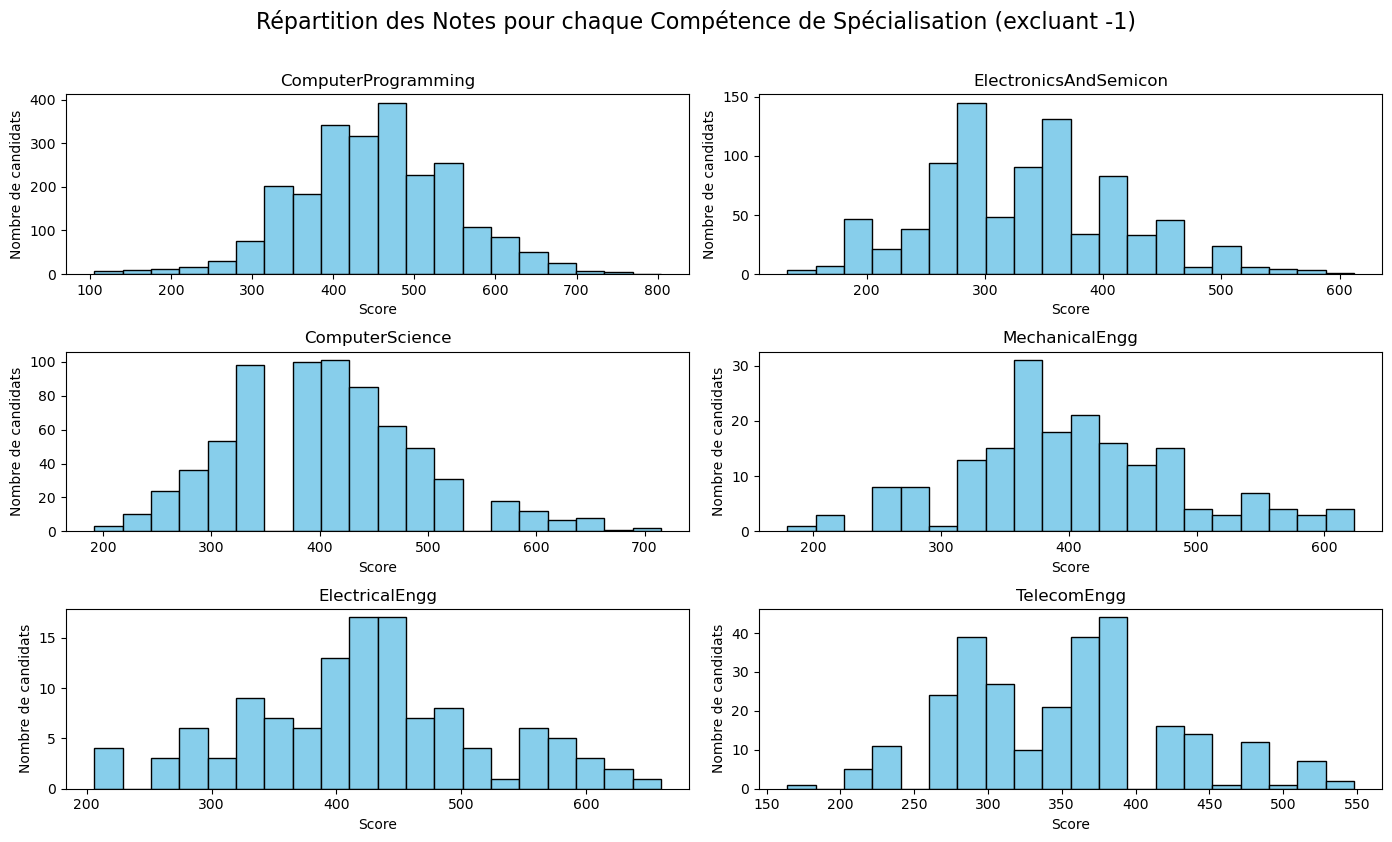

In [117]:
# Exclure les valeurs -1 pour les colonnes de spécialisation avant de tracer les histogrammes
note_columns_specialisation = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 
                               'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg']

# Tracer la répartition des notes pour chaque colonne de spécialisation, sans les -1
plt.figure(figsize=(14, 10))
for i, col in enumerate(note_columns_specialisation, 1):
    plt.subplot(4, 2, i)  # Subplots arrangés pour une meilleure visibilité
    plt.hist(df[col][df[col] != -1].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Score')
    plt.ylabel('Nombre de candidats')
    plt.tight_layout(pad=1.0)

plt.suptitle("Répartition des Notes pour chaque Compétence de Spécialisation (excluant -1)", y=1.05, fontsize=16)
plt.show()

In [ ]:
# Charger les données de l'Inde (ajustez le chemin selon l'emplacement de votre shapefile)
india_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
india_map = india_map[india_map.name == "India"]  # Filtrer uniquement l'Inde

# Liste des états mentionnés dans le dataset
states_in_dataset = df['CollegeState'].unique()

# Charger un shapefile des états indiens si disponible
# Vous pouvez remplacer par le chemin de votre fichier de shapefile spécifique à l'Inde
states_map = gpd.read_file("path_to_india_states_shapefile.shp")

# Filtrer uniquement les états présents dans le dataset
highlighted_states = states_map[states_map['state_name_column'].isin(states_in_dataset)]

# Tracer la carte
fig, ax = plt.subplots(figsize=(10, 12))
india_map.plot(ax=ax, color='lightgrey')  # Couleur de fond pour l'Inde
highlighted_states.plot(ax=ax, color='skyblue', edgecolor='black')  # Couleur pour les états dans le dataset
plt.title("États indiens mentionnés dans le dataset")
plt.show()

NameError: name 'gpd' is not defined

# 4. Préparation pour la modélisation
• Diviser les données en ensembles d'entraînement et de test <br>
• Normaliser/standardiser les features ( caractéristiques) si nécessaire

# 5. Régression linéaire
• Implémenter une régression linéaire multiple pour prédire une variable continue <br>
• Évaluer le modèle (R², RMSE) et interpréter les coefficients

# 6. Classification et Machine Learning
• Comparer ces algorithmes et choisir le plus adapté pour votre étude : <br>
    •  Régression logistique<br>
    • Arbre de décision<br>
    • Random Forest<br>
• SVM<br>
• Évaluer les performances (précision, rappel, F1-score, courbe ROC)<br>
• Optimiser les hyperparamètres avec GridSearchCV ou RandomizedSearchCV

# 8. Prédiction et Déploiement du Modèle
• Sélectionner le meilleur modèle basé sur les performances<br>
• Entraîner le modèle final sur l'ensemble des données<br>
• Créer une fonction de prédiction qui prend en entrée des caractéristiques
(features) et permet de prédire des résultats (à vous de préciser quel type de 
résultat prédire)<br>
• Développer une interface simple pour utiliser le modèle (par exemple, avec 
Streamlit ou Flask)


# 9. Interprétation et conclusions
• Résumer les principaux insights de l'analyse<br>
• Identifier les facteurs les plus importants pour la prédiction selon le domaine 
choisi<br>
• Proposer des recommandations basées sur les résultats